In [1]:
import os
import numpy as np
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms


class CoronarySmallDataset(Dataset):
    def __init__(self, dicom_dir, binary_dir, keypoint_dir, output_dir, transform=None):
        self.dicom_dir = dicom_dir
        self.binary_dir = binary_dir
        self.keypoint_dir = keypoint_dir
        self.output_dir = output_dir
        self.transform = transform
        self.input_files = os.listdir(binary_dir)

    def __len__(self):
        return len(self.input_files)

    def __getitem__(self, idx):
        SIZE = 256
        dicom_path = os.path.join(self.dicom_dir, self.input_files[idx])
        binary_path = os.path.join(self.binary_dir, self.input_files[idx])
        keypoint_path = os.path.join(self.keypoint_dir, self.input_files[idx])
        output_path = os.path.join(self.output_dir, self.input_files[idx])

        dicom = cv2.imread(dicom_path, cv2.IMREAD_UNCHANGED)
        dicom = cv2.cvtColor(dicom, cv2.COLOR_RGBA2RGB)
        dicom = cv2.resize(dicom, (SIZE, SIZE))

        binary = cv2.imread(binary_path, cv2.IMREAD_UNCHANGED)
        binary = cv2.resize(binary, (SIZE, SIZE), interpolation=cv2.INTER_NEAREST)

        keypoint = cv2.imread(keypoint_path, cv2.IMREAD_UNCHANGED)
        keypoint = cv2.resize(keypoint, (SIZE, SIZE), interpolation=cv2.INTER_NEAREST)

        binary[binary > 0] += 28
        binary = np.expand_dims(binary, axis=2)
        keypoint[keypoint > 0] += 30
        keypoint = np.expand_dims(keypoint, axis=2)
        input = np.concatenate((dicom, binary, keypoint), axis=2)

        output = cv2.imread(output_path, cv2.IMREAD_UNCHANGED)
        output = cv2.resize(output, (SIZE, SIZE), interpolation=cv2.INTER_NEAREST)
        
        if self.transform:
            input = self.transform(input)
            output = torch.tensor(output, dtype=torch.long)
        
        return input, output


transform = transforms.Compose([
    transforms.ToTensor()
])

train_dicom_dir = '../images/images_right/images_train/input_dicom'
train_binary_dir = '../images/images_right/images_train/binary'
train_keypoint_dir = '../images/images_right/images_train/keypoints'
train_output_dir = '../images/images_right/images_train/output'

val_dicom_dir = '../images/images_right/images_val/input_dicom'
val_binary_dir = '../images/images_right/images_val/binary'
val_keypoint_dir = '../images/images_right/images_val/keypoints'
val_output_dir = '../images/images_right/images_val/output'

test_dicom_dir = '../images/images_right/images_test/input_dicom'
test_binary_dir = '../images/images_right/images_test/binary'
test_keypoint_dir = '../images/images_right/images_test/keypoints'
test_output_dir = '../images/images_right/images_test/output'

train_dataset = CoronarySmallDataset(train_dicom_dir, train_binary_dir, train_keypoint_dir, train_output_dir, transform=transform)
val_dataset = CoronarySmallDataset(val_dicom_dir, val_binary_dir, val_keypoint_dir, val_output_dir, transform=transform)
test_dataset = CoronarySmallDataset(test_dicom_dir, test_binary_dir, test_keypoint_dir, test_output_dir, transform=transform)


train_loader = DataLoader(train_dataset, batch_size=6, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=6, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=6, shuffle=False)


In [2]:
segment_names={
    '1': "RCA proximal",
    '2': "RCA mid",
    '3': "RCA distal",
    '4': "Posterior descending artery",
    '5': "Left main",
    '6': "LAD proximal",
    '7': "LAD mid",
    '8': "LAD aplical",
    '9': "First diagonal",
    '9a': "First diagonal a",
    '10': "Second diagonal",
    '10a': "Second diagonal a",
    '11': "Proximal circumflex artery",
    '12': "Intermediate/anterolateral artery",
    '12a': "Obtuse marginal a",
    '12b': "Obtuse marginal b",
    '13': "Distal circumflex artery",
    '14': "Left posterolateral",
    '14a': "Left posterolateral a",
    '14b': "Left posterolateral b",
    '15': "Posterior descending",
    '16': "Posterolateral branch from RCA",
    '16a': "Posterolateral branch from RCA, first",
    '16b': "Posterolateral branch from RCA, second",
    '16c': "Posterolateral branch from RCA, third",
}
segment_colors = {
    '0':   [0],
    '1':   [1],
    '2':   [2],
    '3':   [3],
    '4':   [4],
    '5':   [5],
    '6':   [6],
    '7':   [7],
    '8':   [8],
    '9':   [9],
    '9a':  [10],
    '10':  [11],
    '10a': [12],
    '11':  [13],
    '12':  [14],
    '12a': [15],
    '12b': [16],
    '13':  [17],
    '14':  [18],
    '14a': [29],
    '14b': [20],
    '15':  [21],
    '16':  [22],
    '16a': [23],
    '16b': [24],
    '16c': [25],
    
    '99':  [26],
    '22':  [27],
    '255': [26],
}
# colors_dict = {
#     0:  [0, 0, 0], # black
#     1:  [102, 0, 0], # dark red
#     2:  [0, 255, 0], # green
#     3:  [0, 204, 204], # light blue
#     4:  [204, 0, 102], # pink
#     5:  [204, 204, 0], # yellow
#     6:  [76, 153, 0], # dark green
#     7:  [204, 0, 0], # red
#     8:  [0, 128, 255], # blue
#     9: [0, 102, 51], # dark green
#     10: [0, 102, 102], # light blue
#     11: [178, 255, 102], # light green
#     12: [178, 255, 202], # light green
#     13: [0, 102, 102], # light blue
#     14: [255, 102, 102], # light red
#     15: [255, 202, 102], # light red
#     16: [255, 102, 202], # light red
#     17: [0, 51, 102], # dark blue
#     18: [51, 255, 153], # light green
#     19: [51, 155, 153], # light green
#     20: [51, 255, 53], # light green
#     21: [153, 51, 255],  # light purple
#     22: [255, 255, 0], # yellow
#     23: [153, 251, 255], # light blue
#     24: [100, 100, 100], # grey
#     25: [200, 200, 200], # grey
#     26: [255, 255, 255],  # white 
#     27: [255, 255, 0], # yellow
# }
colors_dict = {
    0:  [0, 0, 0],        # black
    1:  [128, 0, 0],      # maroon
    2:  [0, 128, 0],      # dark green
    3:  [0, 128, 255],    # medium blue
    4:  [255, 0, 128],    # bright pink
    5:  [255, 255, 0],    # yellow
    6:  [34, 139, 34],    # forest green
    7:  [255, 69, 0],     # orange red
    8:  [70, 130, 180],   # steel blue
    9:  [85, 107, 47],    # olive green
    10: [0, 206, 209],    # turquoise
    11: [154, 205, 50],   # yellow green
    12: [135, 206, 250],  # sky blue
    13: [255, 20, 147],   # deep pink
    14: [250, 128, 114],  # salmon
    15: [255, 165, 0],    # orange
    16: [148, 0, 211],    # dark violet
    17: [75, 0, 130],     # indigo
    18: [220, 20, 60],    # crimson
    19: [210, 105, 30],   # chocolate
    20: [255, 140, 0],    # dark orange
    21: [255, 215, 0],    # gold
    22: [0, 191, 255],    # deep sky blue
    23: [105, 105, 105],  # dim gray
    24: [211, 211, 211],  # light gray
    25: [255, 255, 255],  # white
    26: [199, 21, 133],   # medium violet red
    27: [46, 139, 87],    # sea green
}


In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Funkcja do generowania legendy
def generate_legend(mask, segment_names, segment_colors, colors_dict):
    unique_values = np.unique(mask)  # Znalezienie unikalnych wartości w masce
    legend_items = []

    print("Unique values in mask:", unique_values)
    for value in unique_values:
        # Znajdź segment ID na podstawie `segment_colors`
        segment_id = next((key for key, val in segment_colors.items() if value in val), None)
        if segment_id is None:
            name = "Background"
            color = np.array(colors_dict[0]) / 255.0  # Domyślnie czarny dla "Background"
        else:
            # Pobierz nazwę segmentu i kolor
            name = segment_names.get(segment_id, "Background")
            # color = np.array(colors_dict[segment_colors[segment_id][0]]) / 255.0  # Normalizacja do [0,1]
            color = np.array(colors_dict[value]) / 255.0  # Normalizacja do [0,1]
        
        # Dodaj element do legendy
        legend_items.append(Patch(color=color, label=f"{name}")) #   (Seg ID: {segment_id}, Seg number: {value})"))

    return legend_items

# Główna funkcja
def display_image_with_legend(image, mask, segment_names, segment_colors, colors_dict):
    # Tworzenie legendy
    legend_items = generate_legend(mask, segment_names, segment_colors, colors_dict)

    # Wyświetlanie obrazu z legendą
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')  # Wyłączenie osi
    plt.title("Prediction Image with Legend")

    # Dodanie legendy z boku
    plt.legend(
        handles=legend_items,
        loc='center left',
        bbox_to_anchor=(1, 0.5),  # Pozycjonowanie legendy obok obrazu
        frameon=False
    )
    plt.show()

# Tworzenie obrazu z maski
def create_colored_image(mask, segment_colors, colors_dict):
    image = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)

    for value in np.unique(mask):
        # Znajdź segment ID na podstawie `segment_colors`
        segment_id = next((key for key, val in segment_colors.items() if value in val), None)
        if segment_id is None:
            color = colors_dict[0]  # Domyślnie czarny
        else:
            color = colors_dict[segment_colors[segment_id][0]]  # Pobierz kolor z `colors_dict`

        image[mask == value] = color

    return image



In [4]:
from converter_RGB import convert_int_to_RGB
from large_RGB_model import UNet


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet()
model = model.to(device)

model.load_state_dict(torch.load('model_right_5.pth', map_location=device))
model.eval()

def show_image(type, image_name):
    dir = f"..\images\images_right\images_test\{type}"
    print(dir)
    if type == 'output':
        img = cv2.imread(os.path.join(dir, image_name), cv2.IMREAD_UNCHANGED)
        print("Oryginalnie: ", np.unique(img))        
        print("Po resize:  ", np.unique(cv2.resize(img, (256, 256), interpolation=cv2.INTER_NEAREST)))
        # img = convert_int_to_RGB(img)
        img = create_colored_image(img, segment_colors, colors_dict)
        # img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)
    else:
        # pass
        img = cv2.imread(os.path.join(dir, image_name), cv2.IMREAD_UNCHANGED)
        print("Oryginalnie: ", np.unique(img))        
        print("Po resize:  ", np.unique(cv2.resize(img, (256, 256), interpolation=cv2.INTER_NEAREST)))
        # img = convert_int_to_RGB(img)
        img = create_colored_image(img, segment_colors, colors_dict)
    # cv2.imshow(type, img)
    plt.axis('off')
    plt.imshow(img)
    plt.show()

def predict(image_name):
    SIZE = 256
    dir_dicom = '..\images\images_right\images_test\input_dicom'
    dir_binary = '..\images\images_right\images_test\\binary'
    dir_keypoint = '..\images\images_right\images_test\keypoints'
    dicom = cv2.imread(os.path.join(dir_dicom, image_name), cv2.IMREAD_UNCHANGED)
    dicom = cv2.cvtColor(dicom, cv2.COLOR_RGBA2RGB)
    dicom = cv2.resize(dicom, (SIZE, SIZE), interpolation=cv2.INTER_NEAREST)
    binary = cv2.imread(os.path.join(dir_binary, image_name), cv2.IMREAD_UNCHANGED)
    binary = cv2.resize(binary, (SIZE, SIZE), interpolation=cv2.INTER_NEAREST)
    keypoint = cv2.imread(os.path.join(dir_keypoint, image_name), cv2.IMREAD_UNCHANGED)
    keypoint = cv2.resize(keypoint, (SIZE, SIZE), interpolation=cv2.INTER_NEAREST)

    binary[binary > 0] += 28
    binary = np.expand_dims(binary, axis=2)
    keypoint[keypoint > 0] += 30
    keypoint = np.expand_dims(keypoint, axis=2)
    input = np.concatenate((dicom, binary, keypoint), axis=2)
    input = transforms.ToTensor()(input).unsqueeze(0).to(device)

    with torch.no_grad():
        prediction = model.predict(input)
        prediction = prediction.squeeze().cpu().numpy()
    print("Z sieci:    ", np.unique(prediction))

    prediction_image = convert_int_to_RGB(prediction)
    prediction_image = cv2.resize(prediction_image, (512, 512))
    prediction_image = cv2.cvtColor(prediction_image, cv2.COLOR_BGR2RGB)
    # cv2.imshow('pred', prediction_image)
    # cv2.waitKey(0)
    
    display_image_with_legend(create_colored_image(prediction, segment_colors, colors_dict), prediction, segment_namess, segment_colors, colors_dict)

FileNotFoundError: [Errno 2] No such file or directory: 'model_right_5.pth'

In [15]:
from converter_RGB import convert_int_to_RGB
from large_RGB_model import UNet


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet()
model = model.to(device)

model.load_state_dict(torch.load('model_right_2.pth', map_location=device))
model.eval()

def display_comparison(image_name, segment_names, segment_colors, colors_dict):
    SIZE = 256
    dir_output = '..\images\images_right\images_test\output'
    dir_dicom = '..\images\images_right\images_test\input_dicom'
    dir_binary = '..\images\images_right\images_test\\binary'
    dir_keypoint = '..\images\images_right\images_test\keypoints'

    # Load and process the output image
    output_image = cv2.imread(os.path.join(dir_output, image_name), cv2.IMREAD_UNCHANGED)
    output_image = cv2.resize(output_image, (SIZE, SIZE), interpolation=cv2.INTER_NEAREST)
    output_image_colored = create_colored_image(output_image, segment_colors, colors_dict)

    # Load and process the input images
    dicom = cv2.imread(os.path.join(dir_dicom, image_name), cv2.IMREAD_UNCHANGED)
    dicom = cv2.cvtColor(dicom, cv2.COLOR_RGBA2RGB)
    dicom = cv2.resize(dicom, (SIZE, SIZE), interpolation=cv2.INTER_NEAREST)
    binary = cv2.imread(os.path.join(dir_binary, image_name), cv2.IMREAD_UNCHANGED)
    binary = cv2.resize(binary, (SIZE, SIZE), interpolation=cv2.INTER_NEAREST)
    keypoint = cv2.imread(os.path.join(dir_keypoint, image_name), cv2.IMREAD_UNCHANGED)
    keypoint = cv2.resize(keypoint, (SIZE, SIZE), interpolation=cv2.INTER_NEAREST)

    binary[binary > 0] += 28
    binary = np.expand_dims(binary, axis=2)
    keypoint[keypoint > 0] += 30
    keypoint = np.expand_dims(keypoint, axis=2)
    input_image = np.concatenate((dicom, binary, keypoint), axis=2)
    input_image = transforms.ToTensor()(input_image).unsqueeze(0).to(device)

    # Generate prediction
    with torch.no_grad():
        prediction = model.predict(input_image)
        prediction = prediction.squeeze().cpu().numpy()

    prediction_colored = create_colored_image(prediction, segment_colors, colors_dict)

    # Plot the images side by side
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[0].imshow(dicom)
    axes[0].set_title('DICOM Image')
    axes[0].axis('off')

    axes[1].imshow(output_image_colored)
    axes[1].set_title('Ground Truth Image')
    axes[1].axis('off')

    axes[2].imshow(prediction_colored)
    axes[2].set_title('Prediction Image')
    axes[2].axis('off')

    # Generate and add legend to the third image
    legend_items = generate_legend(prediction, segment_names, segment_colors, colors_dict)
    axes[2].legend(
        handles=legend_items,
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        frameon=False
    )

    plt.show()


Unique values in mask: [ 0  1  2  3  4 22]


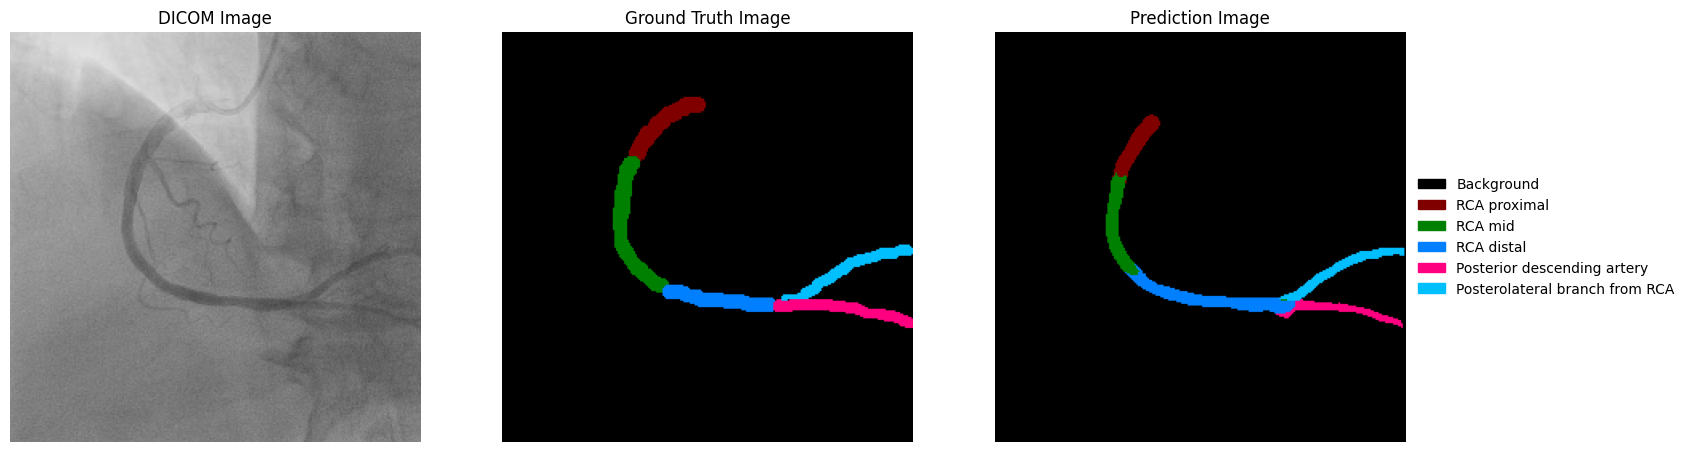

Unique values in mask: [ 0  1  2  3  4 22]


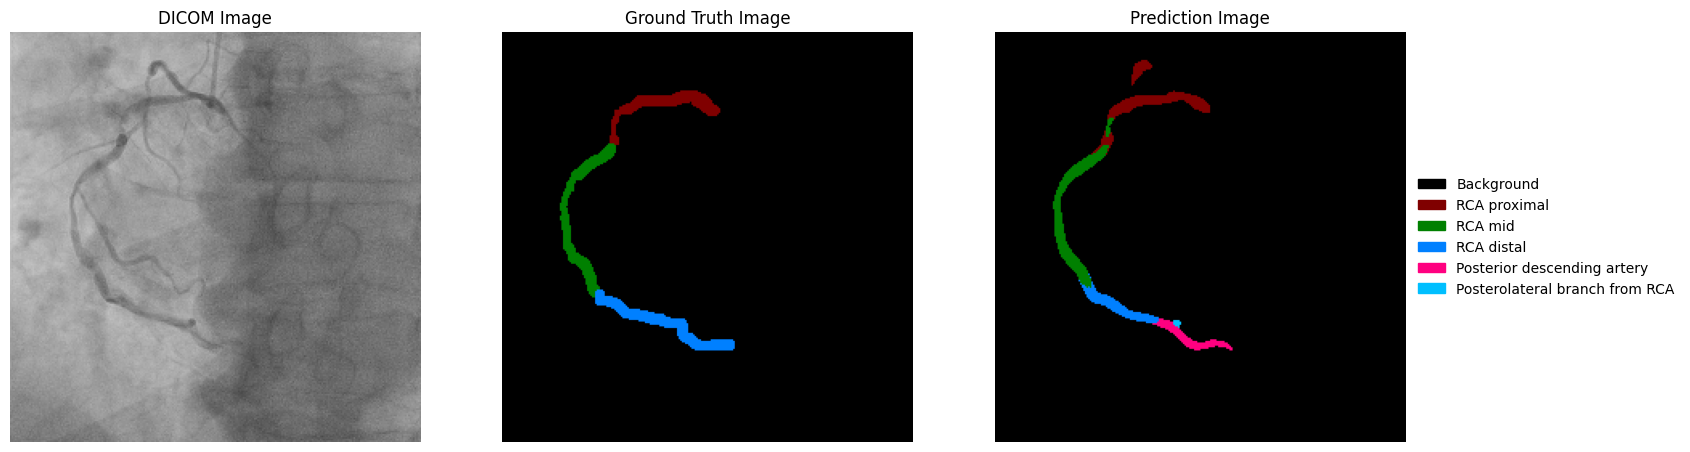

Unique values in mask: [ 0  1  2  3  4 22]


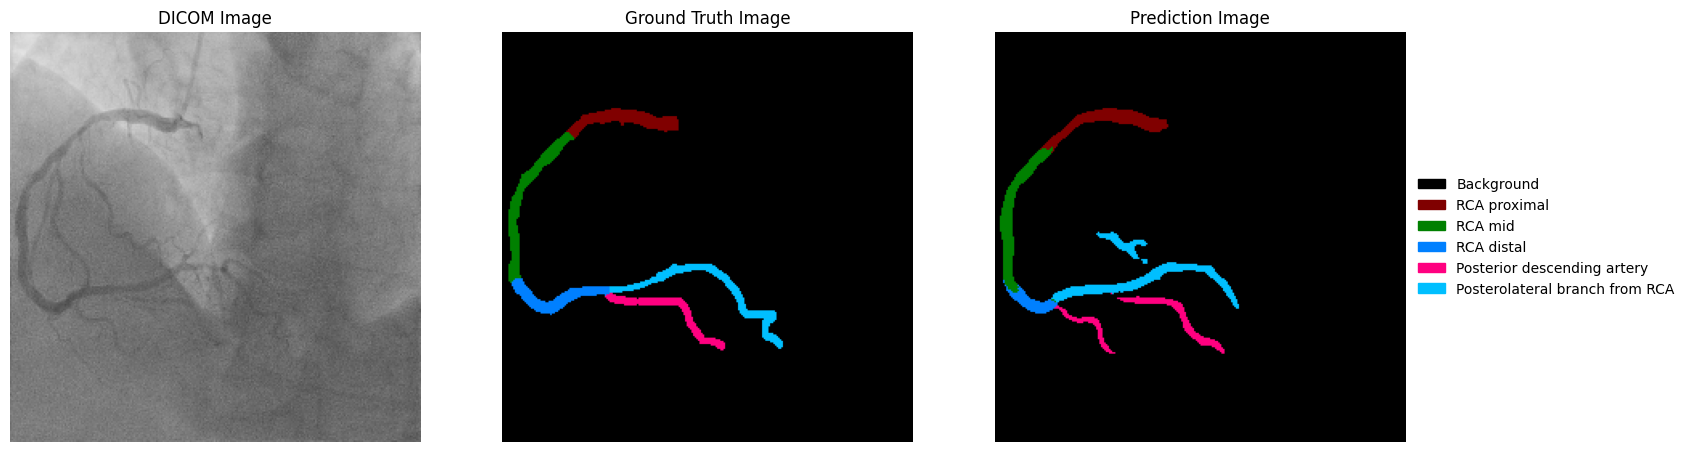

Unique values in mask: [0 1 2 3 4]


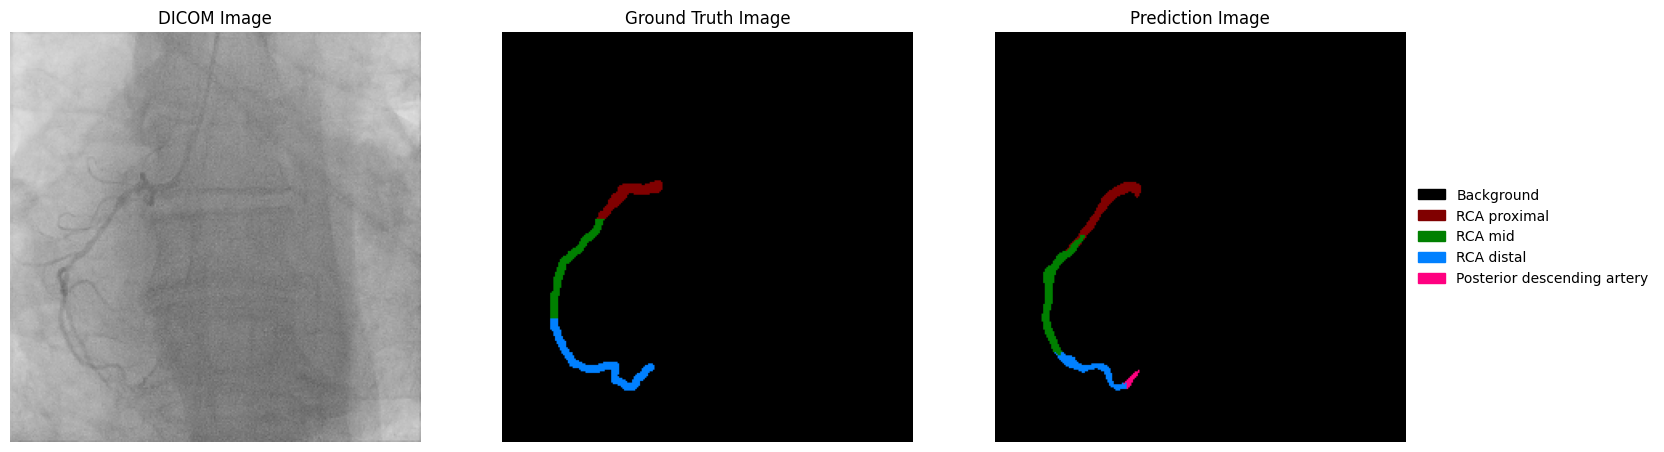

Unique values in mask: [ 0  1  2  3  4 22]


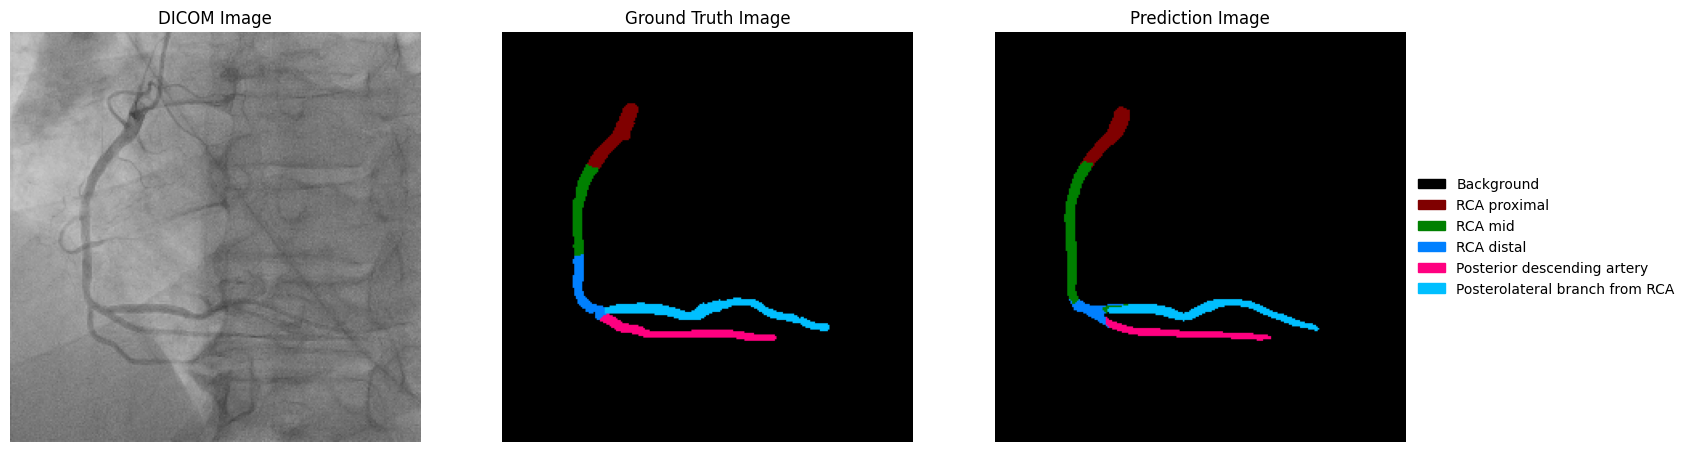

Unique values in mask: [ 0  1  2  3  4 22]


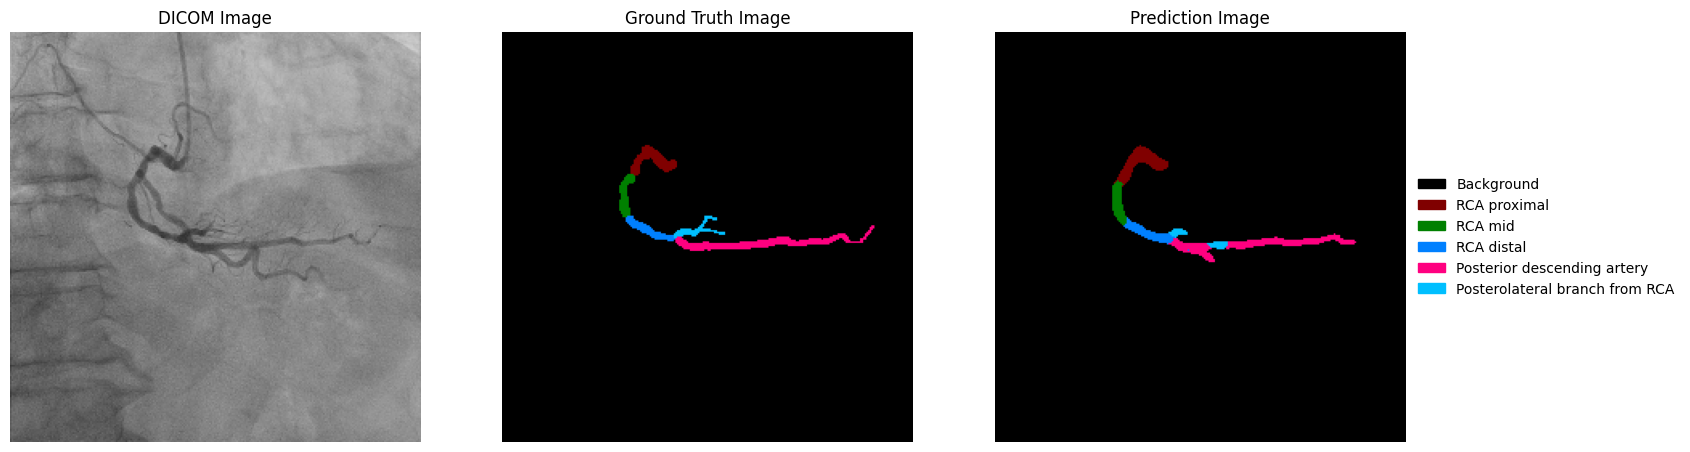

Unique values in mask: [ 0  1  2  3  4 22]


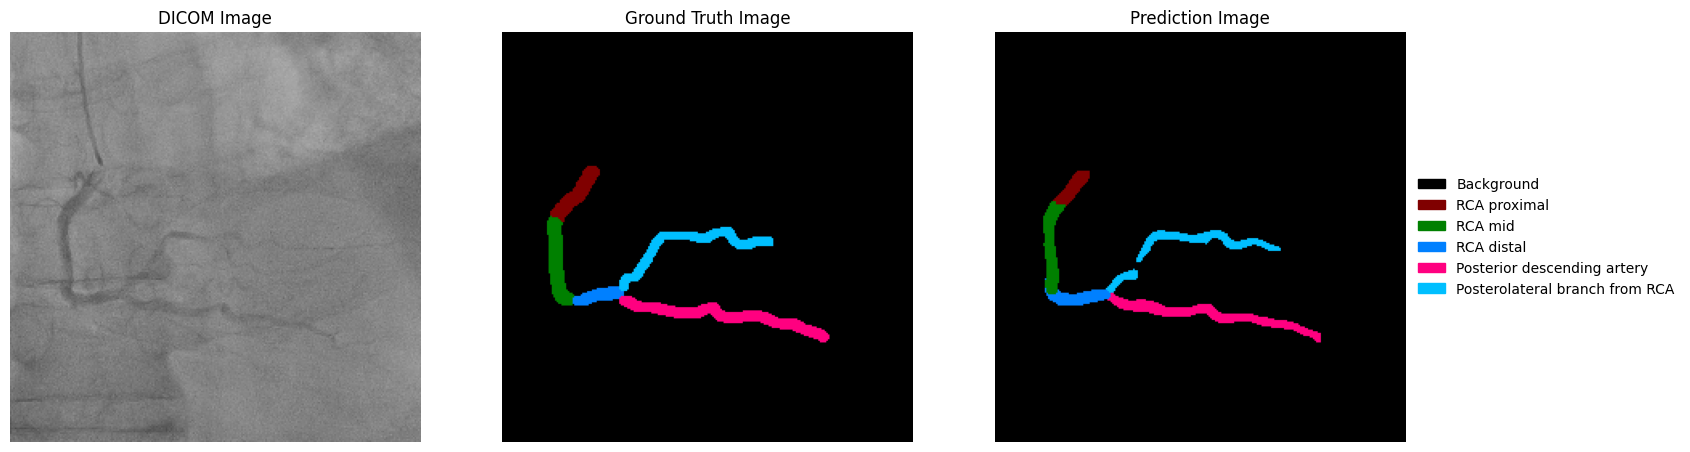

Unique values in mask: [ 0  1  2  3  4 22]


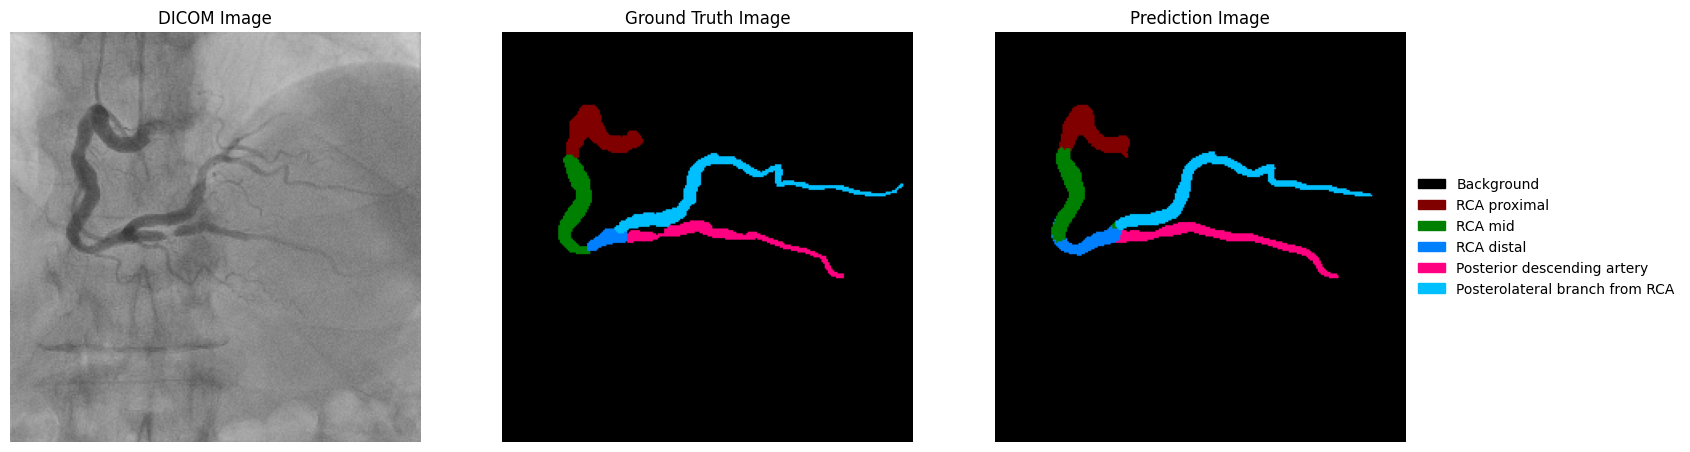

Unique values in mask: [ 0  1  2  3  4 22]


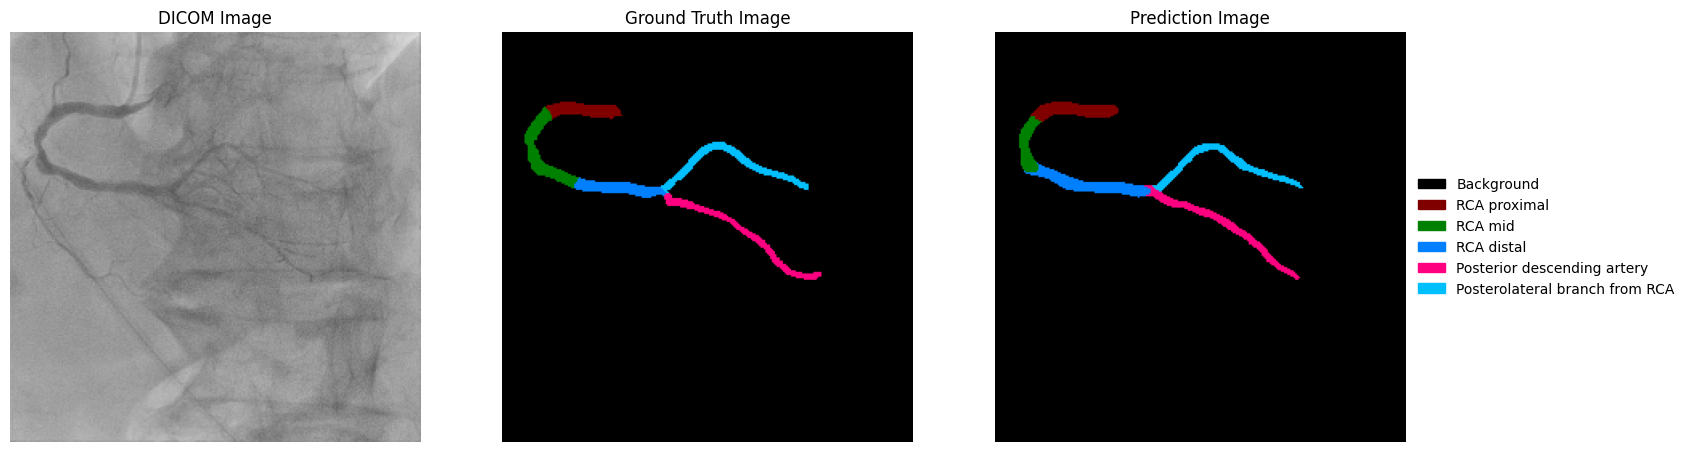

Unique values in mask: [ 0  1  2  3  4 22]


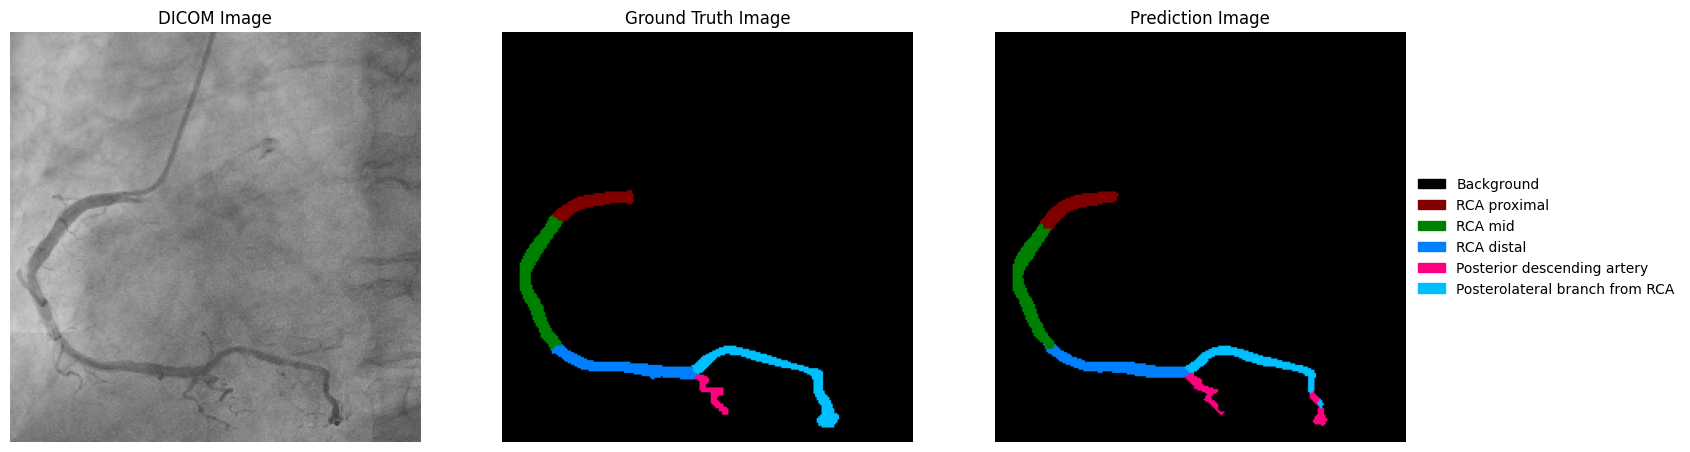

Unique values in mask: [ 0  1  2  3  4 22]


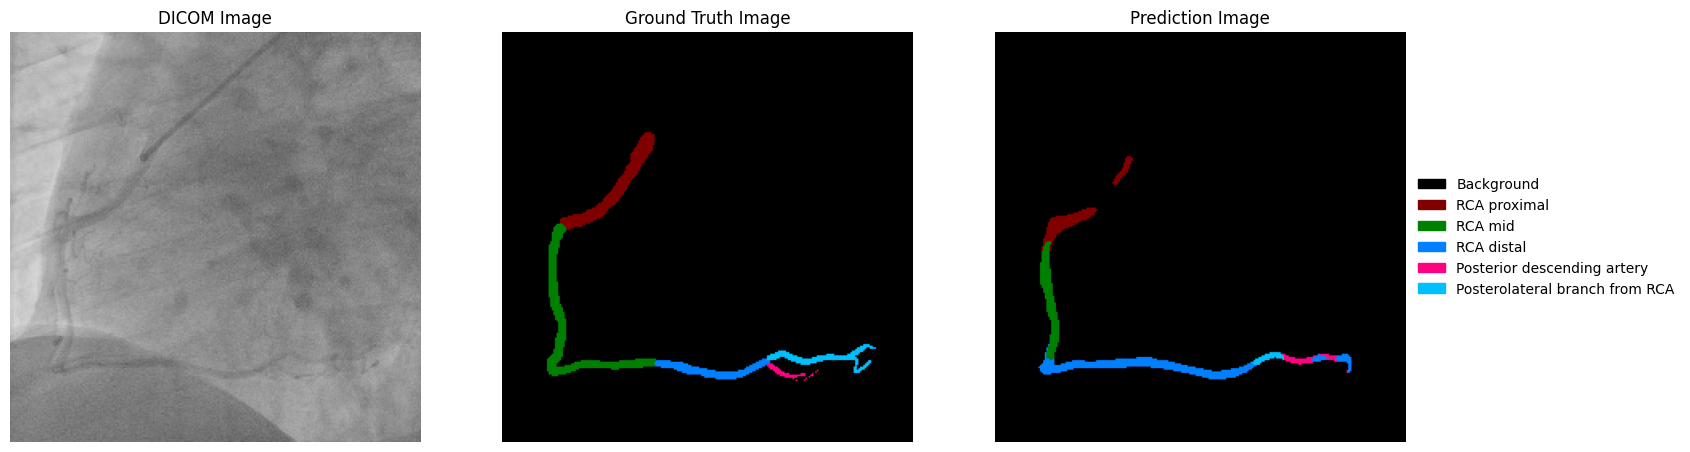

Unique values in mask: [ 0  1  2  3  4 22]


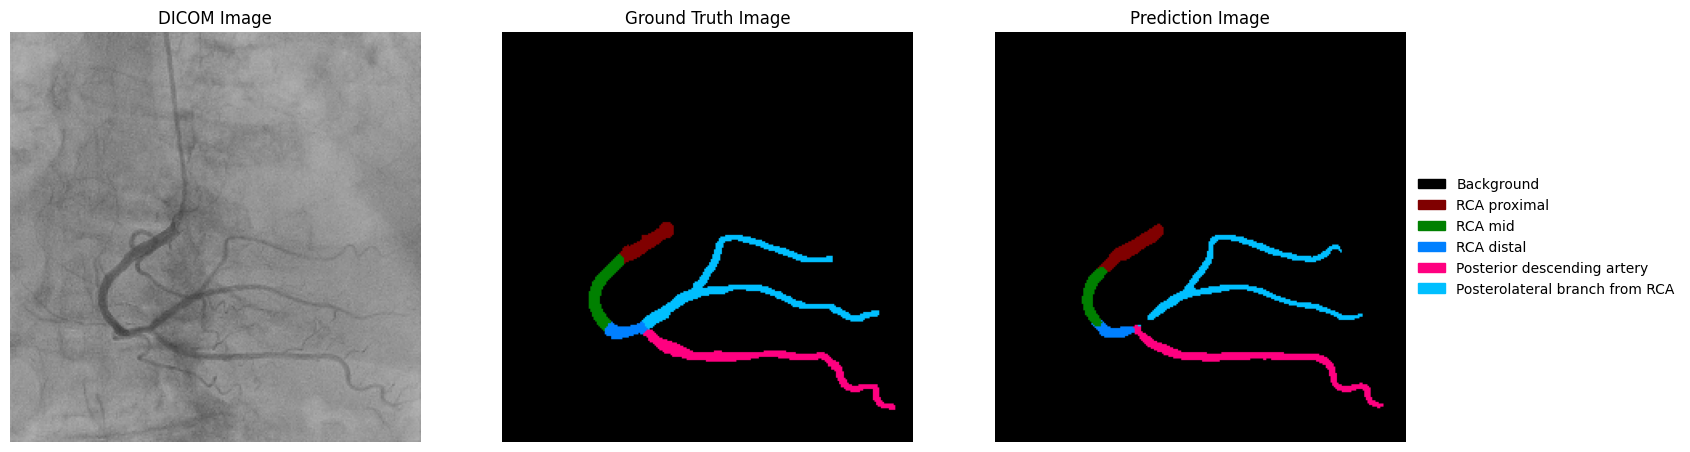

Unique values in mask: [ 0  1  2  3  4 22]


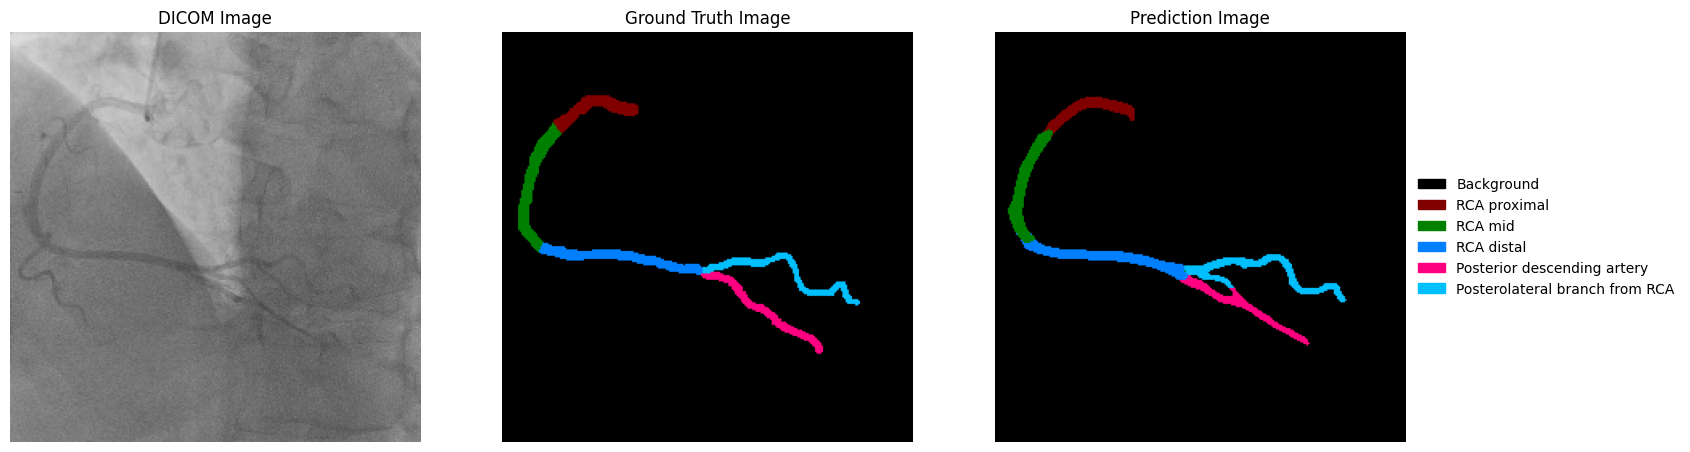

Unique values in mask: [ 0  1  2  3  4 22]


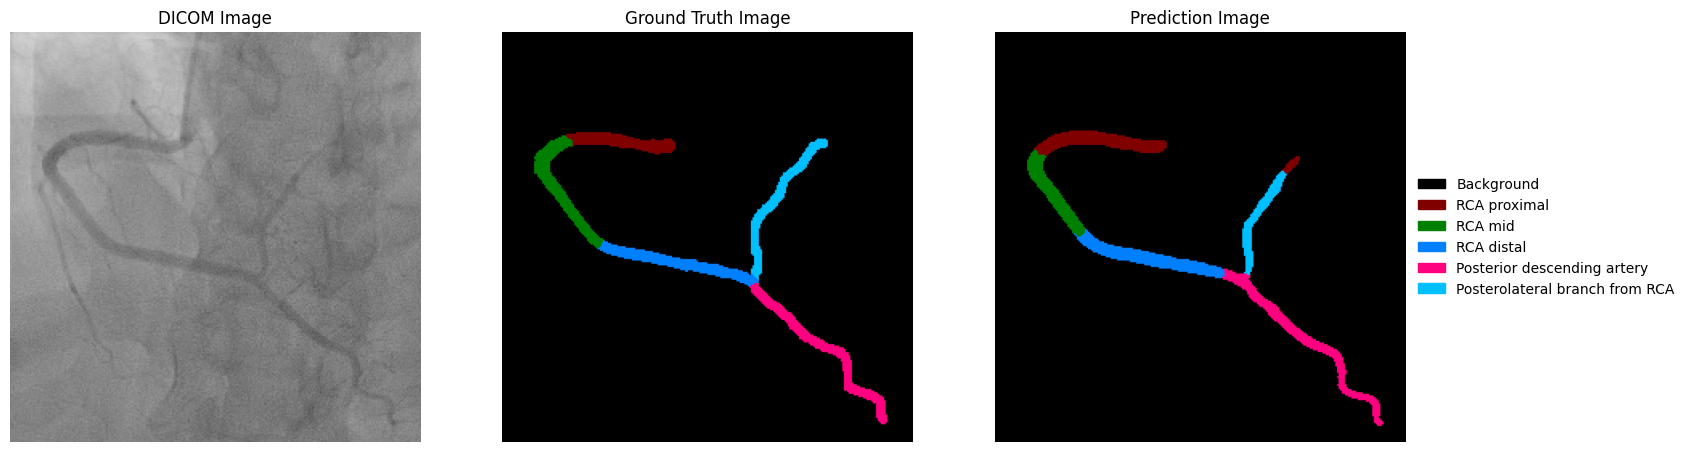

Unique values in mask: [0 1 2 3 4]


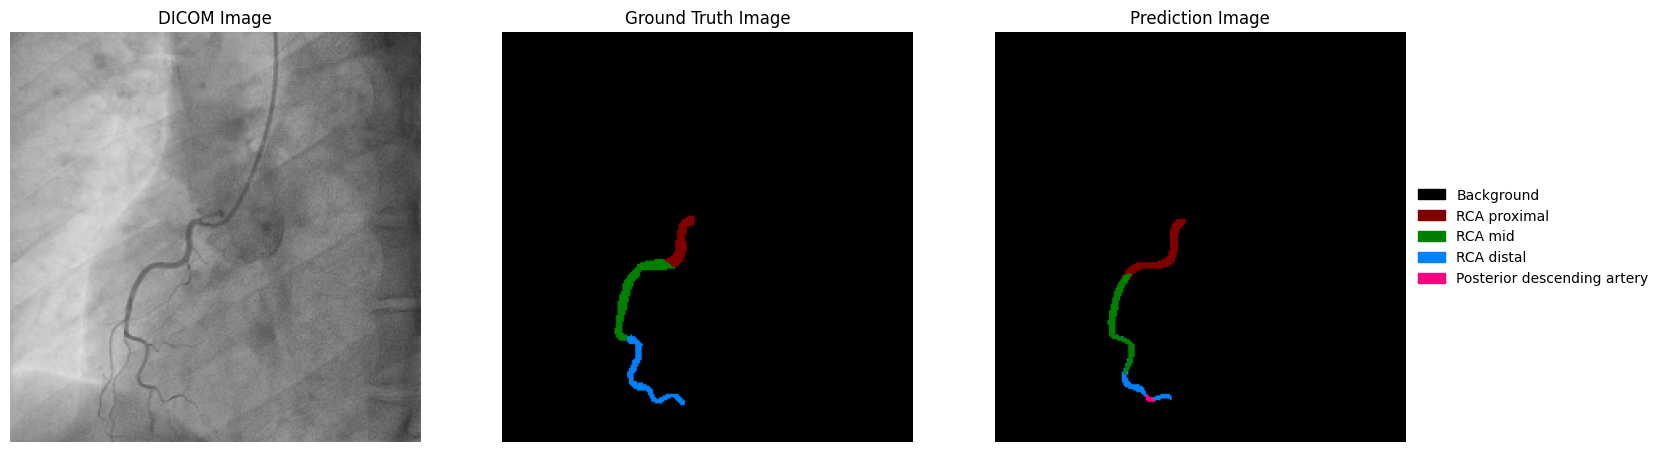

Unique values in mask: [ 0  1  2  3  4 22]


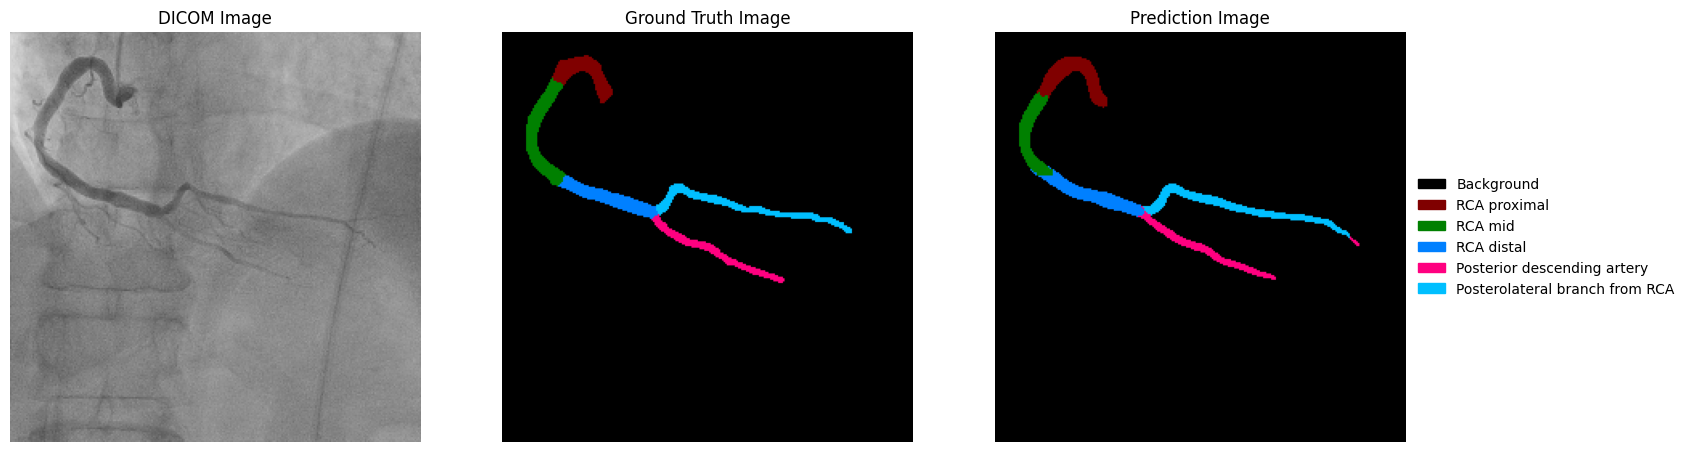

In [17]:
image_name = "131aedfhs6pnf1fvtvp498txzzigu9a222_35.png"
display_comparison(image_name, segment_names, segment_colors, colors_dict)

image_name = "131aedfhs6pnf1fvtvp49jsyag6wauzy22_19.png"
display_comparison(image_name, segment_names, segment_colors, colors_dict)

image_name = "131aedfhs6pnf1fvtvp49jto5dvjn5x422_32.png"
display_comparison(image_name, segment_names, segment_colors, colors_dict)

image_name = "131aedfhs6pnf1fvtvp49jvp6idx06l122_22.png"
display_comparison(image_name, segment_names, segment_colors, colors_dict)

image_name = "131aedfhs6pnf1fvtvp49jwozv2hftsy22_17.png"
display_comparison(image_name, segment_names, segment_colors, colors_dict)

image_name = "131aedfhs6pnf1fvtvp49jxos8ewokq622_28.png"
display_comparison(image_name, segment_names, segment_colors, colors_dict)

image_name = "131aedfhs6pnf1fvtvp49jxtehkqvd1322_14.png"
display_comparison(image_name, segment_names, segment_colors, colors_dict)

image_name = "131aedfhs6pnf1fvtvp49jyn69e2q6lm22_31.png"
display_comparison(image_name, segment_names, segment_colors, colors_dict)

image_name = "131aedfhs6pnf1fvtvp49jyom1phsx7h22_34.png"
display_comparison(image_name, segment_names, segment_colors, colors_dict)

image_name = "131aedfhs6pnf1fvtvp49jyrt5zfj7up22_19.png"
display_comparison(image_name, segment_names, segment_colors, colors_dict)

image_name = "131aedfhs6pnf1fvtvp49jyunm3zopt122_47.png"
display_comparison(image_name, segment_names, segment_colors, colors_dict)

image_name = "131aedfhs6pnf1fvtvp49jyuzi3sqhl722_19.png"
display_comparison(image_name, segment_names, segment_colors, colors_dict)

image_name = "131aedfhs6pnf1fvtvp49jzlwxgjix8e22_22.png"
display_comparison(image_name, segment_names, segment_colors, colors_dict)

image_name = "131aedfhs6pnf1fvtvp49jzm9mpjal0f22_24.png"
display_comparison(image_name, segment_names, segment_colors, colors_dict)

image_name = "131aedfhs6pnf1fvtvp49jzp4u1zkeyg22_19.png"
display_comparison(image_name, segment_names, segment_colors, colors_dict)

image_name = "131aedfhs6pnf1fvtvp49jzq6gxjgdyd22_44.png"
display_comparison(image_name, segment_names, segment_colors, colors_dict)


In [6]:
dir_left = '..\images\images_left\images_test\input_dicom'
dir_right = '..\images\images_right\images_test\input_dicom'

images_left = os.listdir(dir_left)
images_right = os.listdir(dir_right)

print("Size of right: ", len(images_right))
for image in images_right:
    print(image)

Size of right:  48
131aedfhs6pnf1fvtvp498txzzigu9a222_35.png
131aedfhs6pnf1fvtvp49jsyag6wauzy22_19.png
131aedfhs6pnf1fvtvp49jto5dvjn5x422_32.png
131aedfhs6pnf1fvtvp49jvp6idx06l122_22.png
131aedfhs6pnf1fvtvp49jwozv2hftsy22_17.png
131aedfhs6pnf1fvtvp49jxos8ewokq622_28.png
131aedfhs6pnf1fvtvp49jxtehkqvd1322_14.png
131aedfhs6pnf1fvtvp49jyn69e2q6lm22_31.png
131aedfhs6pnf1fvtvp49jyom1phsx7h22_34.png
131aedfhs6pnf1fvtvp49jyrt5zfj7up22_19.png
131aedfhs6pnf1fvtvp49jyunm3zopt122_47.png
131aedfhs6pnf1fvtvp49jyuzi3sqhl722_19.png
131aedfhs6pnf1fvtvp49jzlwxgjix8e22_22.png
131aedfhs6pnf1fvtvp49jzm9mpjal0f22_24.png
131aedfhs6pnf1fvtvp49jzp4u1zkeyg22_19.png
131aedfhs6pnf1fvtvp49jzq6gw72kpe22_41.png
131aedfhs6pnf1fvtvp49jzq6gxjgdyd22_34.png
131aedfhs6pnf1fvtvp49jzq6gxjgdyd22_44.png
131aedfhs6pnf1fvtvp49jzq6gxwoxtj22_34.png
131aedfhs6pnf1fvtvp49mff2pm7g60u22_48.png
131aedfhs6pnf1fvtvp49mffrz0osk7522_36.png
131aedfhs6pnf1fvtvp49mfhjwsak2qg22_28.png
131aedfhs6pnf1fvtvp49mg85rd0fgxd22_32.png
131aedfhs6pnf1f

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score


def compute_accuracy(model, data_loader, device):
    model.eval()
    correct = 0
    correct_clear = 0
    total = 0
    total_clear = 0

    with torch.no_grad():
        for images, masks in data_loader:
            images = images.to(device)
            masks = masks.to(device)

            preds = model.predict(images)
            
            correct += (preds == masks).sum().item()
            correct_clear += (preds[masks != 0] == masks[masks != 0]).sum().item()
            total += masks.numel()
            total_clear += masks[masks != 0].numel()

    accuracy = correct / total
    accuracy_clear = correct_clear / total_clear
    return accuracy, accuracy_clear

In [21]:
def compute_precision_recall_f1(model, data_loader, device, num_classes=28):
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for images, masks in data_loader:
            images = images.to(device)
            masks = masks.to(device)

            preds = model.predict(images)
            
            all_preds.append(preds.view(-1).cpu().numpy())
            all_targets.append(masks.view(-1).cpu().numpy())

    all_preds = np.concatenate(all_preds)
    all_targets = np.concatenate(all_targets)

    TP = np.zeros(num_classes)
    FP = np.zeros(num_classes)
    FN = np.zeros(num_classes)

    for i in range(num_classes):
        TP[i] = ((all_preds == i) & (all_targets == i)).sum()
        FP[i] = ((all_preds == i) & (all_targets != i)).sum()
        FN[i] = ((all_preds != i) & (all_targets == i)).sum()
    
    TP[0], FP[0], FN[0] = 0, 0, 0
    # print(TP, FP, FN)

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = 2 * precision * recall / (precision + recall)
    # print(TP.sum(), FP.sum(), FN.sum())

    precision_weighted = TP.sum() / (TP.sum() + FP.sum())
    recall_weighted = TP.sum() / (TP.sum() + FN.sum())
    f1_weighted = 2 * precision_weighted * recall_weighted / (precision_weighted + recall_weighted)

    return precision, recall, f1, precision_weighted, recall_weighted, f1_weighted

In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet().to(device)
model.load_state_dict(torch.load('model_right_2.pth', map_location=device))

train_accuracy = compute_accuracy(model, train_loader, device)
val_accuracy = compute_accuracy(model, val_loader, device)
test_accuracy = compute_accuracy(model, test_loader, device)

print(f'Train Accuracy: {train_accuracy[0] * 100 :.2f}%')
print(f'Train Accuracy Clear: {train_accuracy[1] * 100 :.2f}%')
print()
print(f'Validation Accuracy: {val_accuracy[0] * 100 :.2f}%')
print(f'Validation Accuracy Clear: {val_accuracy[1] * 100 :.2f}%')
print()
print(f'Test Accuracy: {test_accuracy[0] * 100 :.2f}%')
print(f'Test Accuracy Clear: {test_accuracy[1] * 100 :.2f}%')

Train Accuracy: 98.58%
Train Accuracy Clear: 70.82%

Validation Accuracy: 98.49%
Validation Accuracy Clear: 67.65%

Test Accuracy: 98.26%
Test Accuracy Clear: 65.45%


In [23]:
model.load_state_dict(torch.load('model_right_2.pth', map_location=device))
precision, recall, f1, precision_weighted, recall_weighted, f1_weighted = compute_precision_recall_f1(model, val_loader, device)

if np.isnan(precision).any():
    precision = np.nan_to_num(precision)
if np.isnan(recall).any():
    recall = np.nan_to_num(recall)
if np.isnan(f1).any():
    f1 = np.nan_to_num(f1)

for i in range(28):
    print(f'Class {i}: Precision: {precision[i] * 100:.2f}%, Recall: {recall[i] * 100:.2f}%, F1: {f1[i] * 100:.2f}%')

print(f'Average Precision: {np.mean(precision) * 100:.3f}%')
print(f'Average Recall: {np.mean(recall) * 100:.3f}%')
print(f'Average F1: {np.mean(f1) * 100:.3f}%')
print()
print(f'Weighted Precision: {precision_weighted * 100:.3f}%')
print(f'Weighted Recall: {recall_weighted * 100:.3f}%')
print(f'Weighted F1: {f1_weighted * 100:.3f}%')

Class 0: Precision: 0.00%, Recall: 0.00%, F1: 0.00%
Class 1: Precision: 75.80%, Recall: 79.05%, F1: 77.39%
Class 2: Precision: 69.78%, Recall: 70.09%, F1: 69.93%
Class 3: Precision: 82.58%, Recall: 70.57%, F1: 76.10%
Class 4: Precision: 67.98%, Recall: 64.52%, F1: 66.21%
Class 5: Precision: 0.00%, Recall: 0.00%, F1: 0.00%
Class 6: Precision: 0.00%, Recall: 0.00%, F1: 0.00%
Class 7: Precision: 0.00%, Recall: 0.00%, F1: 0.00%
Class 8: Precision: 0.00%, Recall: 0.00%, F1: 0.00%
Class 9: Precision: 0.00%, Recall: 0.00%, F1: 0.00%
Class 10: Precision: 0.00%, Recall: 0.00%, F1: 0.00%
Class 11: Precision: 0.00%, Recall: 0.00%, F1: 0.00%
Class 12: Precision: 0.00%, Recall: 0.00%, F1: 0.00%
Class 13: Precision: 0.00%, Recall: 0.00%, F1: 0.00%
Class 14: Precision: 0.00%, Recall: 0.00%, F1: 0.00%
Class 15: Precision: 0.00%, Recall: 0.00%, F1: 0.00%
Class 16: Precision: 0.00%, Recall: 0.00%, F1: 0.00%
Class 17: Precision: 0.00%, Recall: 0.00%, F1: 0.00%
Class 18: Precision: 0.00%, Recall: 0.00%, F

C:\Users\Szymon\AppData\Local\Temp\ipykernel_18564\1128418758.py:31: RuntimeWarning: invalid value encountered in divide
  precision = TP / (TP + FP)
C:\Users\Szymon\AppData\Local\Temp\ipykernel_18564\1128418758.py:32: RuntimeWarning: invalid value encountered in divide
  recall = TP / (TP + FN)
